In [1]:
!pip install music21

In [2]:
!pip install midi2audio

In [3]:
!pip install fluidsynth

  Created wheel for fluidsynth: filename=fluidsynth-0.2-cp36-none-any.whl size=4513 sha256=02a74686d8ae3e4e13ca66cd8dee3b6cad008f5c5ba4701916ec642e606add73
  Stored in directory: /root/.cache/pip/wheels/2d/70/4d/ffe2589bbfe9c268780570a6875583fbf59547004459e2c3c3
Successfully built fluidsynth


In [4]:
!apt install fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 35 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ub

In [5]:
# ต้องใช้ sound font ด้วย ลองหา .sf2 ก่อน
!find / -name *.sf2

/usr/share/sounds/sf2/FluidR3_GM.sf2
/usr/local/lib/python2.7/dist-packages/pretty_midi/TimGM6mb.sf2
/tensorflow-1.15.2/python3.6/pretty_midi/TimGM6mb.sf2


In [6]:
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
cd './drive/My Drive/Automated Music Generation'

/content/drive/My Drive/Automated Music Generation


In [9]:
!unzip 'schubert.zip' -d './../../../Midi_files'

Archive:  schubert.zip
  inflating: ./../../../Midi_files/schubert_D850_1.mid  
  inflating: ./../../../Midi_files/schubert_D850_2.mid  
  inflating: ./../../../Midi_files/schubert_D850_3.mid  
  inflating: ./../../../Midi_files/schubert_D850_4.mid  
  inflating: ./../../../Midi_files/schubert_D935_1.mid  
  inflating: ./../../../Midi_files/schubert_D935_2.mid  
  inflating: ./../../../Midi_files/schubert_D935_3.mid  
  inflating: ./../../../Midi_files/schubert_D935_4.mid  
  inflating: ./../../../Midi_files/schub_d760_1.mid  
  inflating: ./../../../Midi_files/schub_d760_2.mid  
  inflating: ./../../../Midi_files/schub_d760_3.mid  
  inflating: ./../../../Midi_files/schub_d760_4.mid  
  inflating: ./../../../Midi_files/schub_d960_1.mid  
  inflating: ./../../../Midi_files/schub_d960_2.mid  
  inflating: ./../../../Midi_files/schub_d960_3.mid  
  inflating: ./../../../Midi_files/schub_d960_4.mid  
  inflating: ./../../../Midi_files/schuim-1.mid  
  inflating: ./../../../Midi_files/schu

In [10]:
cd './../../../'

/content


In [11]:
from midi2audio import FluidSynth

In [12]:
from music21 import *
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [13]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [14]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='./Midi_files/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: ./Midi_files/schub_d960_2.mid
Loading Music File: ./Midi_files/schuim-4.mid
Loading Music File: ./Midi_files/schu_143_1.mid
Loading Music File: ./Midi_files/schumm-2.mid
Loading Music File: ./Midi_files/schubert_D850_2.mid
Loading Music File: ./Midi_files/schuim-2.mid
Loading Music File: ./Midi_files/schub_d760_3.mid
Loading Music File: ./Midi_files/schumm-6.mid
Loading Music File: ./Midi_files/schu_143_3.mid
Loading Music File: ./Midi_files/schumm-1.mid
Loading Music File: ./Midi_files/schubert_D935_2.mid
Loading Music File: ./Midi_files/schub_d760_2.mid
Loading Music File: ./Midi_files/schumm-4.mid
Loading Music File: ./Midi_files/schubert_D935_4.mid
Loading Music File: ./Midi_files/schumm-5.mid
Loading Music File: ./Midi_files/schubert_D850_4.mid
Loading Music File: ./Midi_files/schub_d760_4.mid
Loading Music File: ./Midi_files/schuim-1.mid
Loading Music File: ./Midi_files/schub_d760_1.mid
Loading Music File: ./Midi_files/schumm-3.mid
Loading Music File: ./Midi_f

In [15]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

304


(array([187.,  41.,  26.,  11.,   6.,   9.,  12.,   6.,   3.,   3.]),
 array([1.0000e+00, 1.4790e+02, 2.9480e+02, 4.4170e+02, 5.8860e+02,
        7.3550e+02, 8.8240e+02, 1.0293e+03, 1.1762e+03, 1.3231e+03,
        1.4700e+03]),
 <a list of 10 Patch objects>)

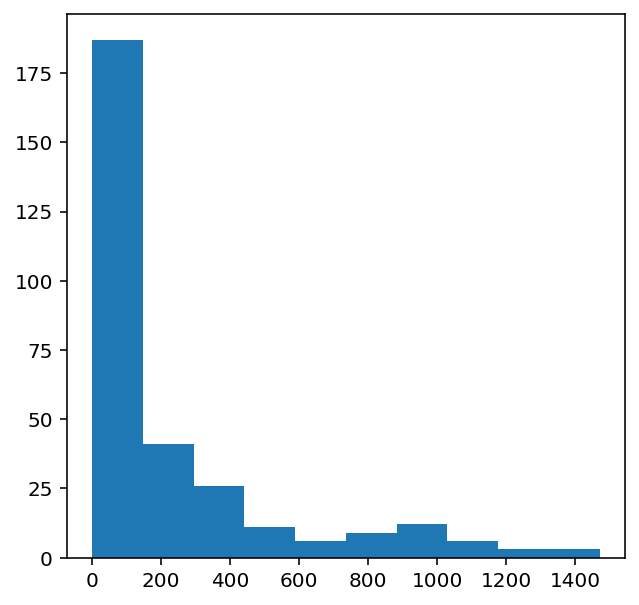

In [16]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [17]:
frequent_notes = [notes for notes, count in freq.items() if count>=50]
print(len(frequent_notes))

167


In [18]:
new_music =[]

for notes in notes_array:
  temp = []
  for note in notes:
    if note in frequent_notes:
      temp.append(note)
  new_music.append(temp)

new_music = np.array(new_music)

In [19]:
time_steps = 64
x = []
y = []

for notes in new_music:
  for i in range(0, len(notes)-time_steps):
    input = notes[i:i+time_steps]
    output = notes[i+time_steps]
    x.append(input)
    y.append(output)

x = np.array(x)
y = np.array(y)

In [20]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note, num) for num, note in enumerate(unique_x))

In [21]:
x_seq = []
for i in x:
  temp = []
  for n in i:
    temp.append(x_note_to_int[n])
  x_seq.append(temp)

x_seq = np.array(x_seq)

In [22]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [23]:
from sklearn.model_selection import train_test_split as tts
x_train, x_val, y_train, y_val = tts(x_seq, y_seq, test_size = 0.2, random_state=0)

In [24]:
def Conv_1d_Model(n_vocab):
  model = keras.models.Sequential()
  model.add(keras.layers.Embedding(len(unique_x), 100, input_length=time_steps,trainable=True))
  model.add(keras.layers.Conv1D(64,3, padding='causal',activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.MaxPool1D(2))

  model.add(keras.layers.Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.MaxPool1D(2))

  model.add(keras.layers.Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.MaxPool1D(2))
  
  model.add(keras.layers.GlobalMaxPool1D())

  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dense(n_vocab, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

  return model

In [25]:
model = Conv_1d_Model(len(unique_y))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 64, 100)           16700     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 64)            19264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 128)           24704     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 128)          

In [27]:
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [28]:
history = model.fit(np.array(x_train),np.array(y_train),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 50890 samples, validate on 12723 samples
Epoch 1/50
50890/50890 [==============================] - 13s 254us/step - loss: 4.4125 - val_loss: 4.1432

Epoch 00001: val_loss improved from inf to 4.14321, saving model to best_model.h5
Epoch 2/50
50890/50890 [==============================] - 6s 114us/step - loss: 3.8824 - val_loss: 3.9163

Epoch 00002: val_loss improved from 4.14321 to 3.91634, saving model to best_model.h5
Epoch 3/50
50890/50890 [==============================] - 6s 113us/step - loss: 3.6714 - val_loss: 3.8402

Epoch 00003: val_loss improved from 3.91634 to 3.84023, saving model to best_model.h5
Epoch 4/50
50890/50890 [==============================] - 6s 112us/step - loss: 3.5215 - val_loss: 3.6471

Epoch 00004: val_loss improved from 3.84023 to 3.64709, saving model to best_model.h5
Epoch 5/50
50890/50890 [==============================] - 6s 112us/step - loss: 3.4056 - val_loss: 3.5662

Epoch 00005: val_loss improved from 3.64709 to 3.56623, saving model to be

In [29]:
from keras.models import load_model
model = load_model('best_model.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [30]:
import random
import music21

def generate_music(Notes_len=10, filename='music.mid'):
    ind = np.random.randint(0,len(x_val)-1)

    random_music = x_val[ind]

    predictions=[]
    for i in range(10):

        random_music = random_music.reshape(1,time_steps)

        prob  = model.predict(random_music)[0]
        y_pred= np.argmax(prob,axis=0)
        predictions.append(y_pred)

        random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
        random_music = random_music[1:]
    
    x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
    predicted_notes = [x_int_to_note[i] for i in predictions]

    def convert_to_midi(prediction_output, filename):
   
        offset = 0
        output_notes = []

        # create note and chord objects based on the values generated by the model
        for pattern in prediction_output:
            
            # pattern is a chord
            if ('.' in pattern) or pattern.isdigit():
                notes_in_chord = pattern.split('.')
                notes = []
                for current_note in notes_in_chord:
                    
                    cn=int(current_note)
                    new_note = music21.note.Note(cn)
                    new_note.storedInstrument = instrument.Piano()
                    notes.append(new_note)
                    
                new_chord = chord.Chord(notes)
                new_chord.offset = offset
                output_notes.append(new_chord)
                
            # pattern is a note
            else:
                
                new_note = music21.note.Note(pattern)
                new_note.offset = offset
                new_note.storedInstrument = instrument.Piano()
                output_notes.append(new_note)

            # increase offset each iteration so that notes do not stack
            offset += 1
        midi_stream = stream.Stream(output_notes)
        midi_stream.write('midi', fp=filename)

    convert_to_midi(predicted_notes, filename)
    
    return predicted_notes

In [31]:
for i in range(1, 6):
  _ = generate_music(filename=str('./music_' + str(i) + '_.mid'))

In [32]:
!fluidsynth -ni font.sf2 './music_1_.mid' -F 'output_1.wav' -r 44100
!fluidsynth -ni font.sf2 './music_2_.mid' -F 'output_2.wav' -r 44100
!fluidsynth -ni font.sf2 './music_3_.mid' -F 'output_3.wav' -r 44100
!fluidsynth -ni font.sf2 './music_4_.mid' -F 'output_4.wav' -r 44100
!fluidsynth -ni font.sf2 './music_5_.mid' -F 'output_5.wav' -r 44100

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_1.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_2.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_3.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_4.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trad

In [33]:
from IPython.display import display
from IPython.display import Audio

In [34]:
display(Audio('output_1.wav'))
display(Audio('output_2.wav'))
display(Audio('output_3.wav'))
display(Audio('output_4.wav'))
display(Audio('output_5.wav'))